In [92]:
from keras import layers, models

class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()

        ## 2개의 Hidden Layer으로 구성
        ## 각 Hidden Layer의 활성화 함수는 relu 함수로 구성
        ## 각 Hidden Layer에 Dropput 기법을 사용(일부 노드를 작동하지 않게)하여 과적합방지
        
        self.add(layers.Dense(Nh_l[0], activation='relu',
                              input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dropout(Pd_l[0]))

        self.add(layers.Dense(Nh_l[1], activation='relu',
                              name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))


        
        
        self.add(layers.Dense(Nout, activation='softmax'))

        self.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

## 10개의 class로 구성된 cifar*10 dataset 사용
## Training dataset은 50000개로 구성된 32X32크기의 컬러 이미지 이다.
## Test dataset은 10000개로 구성된 32X32크기의 컬러 이미지 이다.
import numpy as np
from keras import datasets
from keras.utils import np_utils

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    
    ## 이미지 데이터를 1X3,072 feature vector로 변환하여 구성된 DNN 모델에 입력
    
    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)

    ## 각 feature가 0~1 사이으 크기르 갖도록 Normalize
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)

Train on 40000 samples, validate on 10000 samples
Epoch 1/150
40000/40000 [==============================] - 4s 97us/step - loss: 2.0837 - accuracy: 0.2323 - val_loss: 1.8942 - val_accuracy: 0.3225
Epoch 2/150
40000/40000 [==============================] - 4s 93us/step - loss: 1.9062 - accuracy: 0.3149 - val_loss: 1.8376 - val_accuracy: 0.3378
Epoch 3/150
40000/40000 [==============================] - 4s 92us/step - loss: 1.8464 - accuracy: 0.3393 - val_loss: 1.7849 - val_accuracy: 0.3635
Epoch 4/150
40000/40000 [==============================] - 4s 92us/step - loss: 1.8115 - accuracy: 0.3494 - val_loss: 1.7505 - val_accuracy: 0.3724
Epoch 5/150
40000/40000 [==============================] - 4s 92us/step - loss: 1.7854 - accuracy: 0.3608 - val_loss: 1.7517 - val_accuracy: 0.3716
Epoch 6/150
40000/40000 [==============================] - 4s 91us/step - loss: 1.7649 - accuracy: 0.3688 - val_loss: 1.7198 - val_accuracy: 0.3824
Epoch 7/150
40000/40000 [==============================] - 4s 

40000/40000 [==============================] - 4s 92us/step - loss: 1.5855 - accuracy: 0.4377 - val_loss: 1.5893 - val_accuracy: 0.4348
Epoch 56/150
40000/40000 [==============================] - 4s 91us/step - loss: 1.5817 - accuracy: 0.4359 - val_loss: 1.5854 - val_accuracy: 0.4418
Epoch 57/150
40000/40000 [==============================] - 4s 91us/step - loss: 1.5800 - accuracy: 0.4347 - val_loss: 1.5982 - val_accuracy: 0.4311
Epoch 58/150
40000/40000 [==============================] - 4s 91us/step - loss: 1.5736 - accuracy: 0.4408 - val_loss: 1.5889 - val_accuracy: 0.4331
Epoch 59/150
40000/40000 [==============================] - 4s 91us/step - loss: 1.5741 - accuracy: 0.4403 - val_loss: 1.5784 - val_accuracy: 0.4375
Epoch 60/150
40000/40000 [==============================] - 4s 92us/step - loss: 1.5769 - accuracy: 0.4367 - val_loss: 1.6000 - val_accuracy: 0.4342
Epoch 61/150
40000/40000 [==============================] - 4s 92us/step - loss: 1.5751 - accuracy: 0.4401 - val_loss: 

Epoch 110/150
40000/40000 [==============================] - 4s 92us/step - loss: 1.5264 - accuracy: 0.4533 - val_loss: 1.5928 - val_accuracy: 0.4371
Epoch 111/150
40000/40000 [==============================] - 4s 91us/step - loss: 1.5351 - accuracy: 0.4510 - val_loss: 1.5745 - val_accuracy: 0.4418
Epoch 112/150
40000/40000 [==============================] - 4s 92us/step - loss: 1.5341 - accuracy: 0.4499 - val_loss: 1.5869 - val_accuracy: 0.4395
Epoch 113/150
40000/40000 [==============================] - 4s 91us/step - loss: 1.5367 - accuracy: 0.4512 - val_loss: 1.5905 - val_accuracy: 0.4365
Epoch 114/150
40000/40000 [==============================] - 4s 92us/step - loss: 1.5321 - accuracy: 0.4523 - val_loss: 1.5711 - val_accuracy: 0.4467
Epoch 115/150
40000/40000 [==============================] - 4s 91us/step - loss: 1.5346 - accuracy: 0.4536 - val_loss: 1.5751 - val_accuracy: 0.4472
Epoch 116/150
40000/40000 [==============================] - 4s 91us/step - loss: 1.5374 - accuracy:

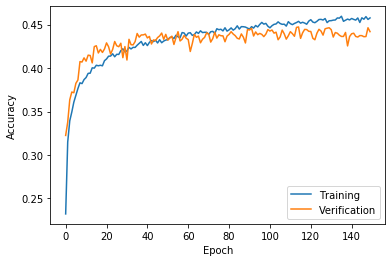

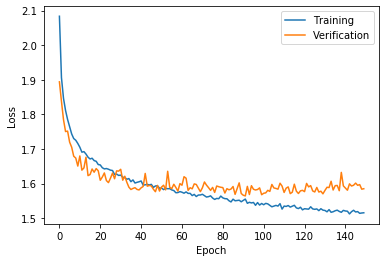

In [93]:
import matplotlib.pyplot as plt

## 구성된 DNN 모델의 각 Epoch에서 accuracy를 plot하는 함수
def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


## 구성된 DNN 모델의 각 Epoch에서 loss를 plot하는 함수
def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    


## Main 함수로서 각 Hidden Layer의 Node 개수는 각각 50, 100 개
## 각 Hidden Layer의 Dropout 확률은 각각 2,40%
## Feature의 class는 10개
## batch_size는 100, epoch은 150번 이다.

def main(Pd_l=[0.02, 0.4]):
    Nh_l = [100, 50]
    number_of_class = 10
    Nout = number_of_class

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
    history = model.fit(X_train, Y_train, epochs=150, batch_size=100, validation_split=0.2)

    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()


if __name__ == '__main__':
    main(Pd_l=[0.02, 0.4])